In [1]:
import pandas as pd
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import geopy.distance

## Narrow down the scope to the US

In [2]:
data=pd.read_csv('df_TAVG.csv')

In [3]:
#set the bounding box of the us and choose stations inside this bounding box
us_data=data[(data['LATITUDE']>=24.9493)&(data['LATITUDE']<=49.5904)&(data['LONGITUDE']>=-125.0011)&
     (data['LONGITUDE']<=-66.9326)]

In [4]:
us_data['COUNTRY']=us_data['NAME'].apply(lambda x: x[-2:])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
#remove other countries' stations
us_data=us_data[us_data['COUNTRY']=='US']

#### Select top 100 stations with most data

In [6]:
df_size=us_data.groupby('STATION')['STATION','LATITUDE','LONGITUDE'].size().sort_values(ascending=False).to_frame('SIZE').reset_index()
df_size=df_size.head(100)
station_names=list(df_size['STATION'])

In [7]:
us_data=us_data.drop_duplicates('STATION')

In [8]:
us_data=us_data.drop(columns='Unnamed: 0')
us_data=us_data.reset_index(drop=True)
us_data

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TAVG,TAVG_ATTRIBUTES,COUNTRY
0,USC00040332,2008-08,35.211100,-118.833600,137.2,"ARVIN, CA US",29.88,"3,0",US
1,USC00140010,1893-01,38.926600,-97.212900,361.8,"ABILENE, KS US",-2.86,"5,6",US
2,USC00140020,1900-04,39.716670,-100.800000,841.9,"ACHILLES, KS US",10.89,"1,6",US
3,USC00140069,1959-05,37.066670,-98.966670,479.1,"AETNA, KS US",20.29,",0",US
4,USC00140127,1948-08,38.250000,-98.300000,512.1,"ALDEN, KS US",25.25,",0",US
5,USC00140200,2008-06,39.448300,-98.970200,521.2,"ALTON 2 SW, KS US",22.37,",0",US
6,USC00140201,1902-12,39.476670,-98.971390,513.6,"ALTON, KS US",-3.93,"1,6",US
7,USC00140203,1900-06,37.533333,-95.666667,248.4,"ALTOONA, KS US",24.79,",6",US
8,USC00140313,1916-10,37.063100,-97.039900,340.8,"ARKANSAS CITY, KS US",15.70,",6",US
9,USC00140326,2010-02,37.913200,-98.147500,496.5,"ARLINGTON 2 NE, KS US",-1.14,",0",US


#### Create point dictionary

In [9]:
point_dict={}
for element in station_names:
    row_num=us_data.loc[us_data['STATION']==element].index[0]
    point_dict[element]=(us_data.iloc[row_num]['LATITUDE'],us_data.iloc[row_num]['LONGITUDE'])
point_dict

{'USW00094728': (40.77898, -73.96925),
 'USW00013724': (39.37778, -74.42361),
 'USW00023271': (38.5552, -121.4183),
 'USW00024128': (40.9017, -117.808),
 'USW00014936': (44.3981, -98.2231),
 'USW00093820': (38.0408, -84.6058),
 'USW00014898': (44.4794, -88.1366),
 'USC00215638': (45.5901, -95.8745),
 'USW00024157': (47.6216, -117.528),
 'USC00173046': (44.2202, -69.789),
 'USW00013872': (35.5954, -82.5568),
 'USC00200146': (43.3869, -84.6482),
 'USC00035186': (35.6042, -91.2744),
 'USC00200032': (41.9163, -84.0158),
 'USC00200230': (42.29806, -83.66388),
 'USC00211891': (47.8014, -96.6031),
 'USW00013782': (32.775, -79.9239),
 'USC00131533': (40.7244, -95.0191),
 'USC00444876': (37.7767, -79.4385),
 'USC00131635': (41.7947, -90.2639),
 'USC00143954': (37.2363, -95.7002),
 'USC00332791': (41.0461, -83.6622),
 'USW00014929': (45.4433, -98.413),
 'USW00013976': (30.205, -91.9875),
 'USC00125337': (40.58, -85.6586),
 'USC00190736': (42.2123, -71.1137),
 'USC00131319': (42.0496, -91.5881),


In [10]:
#create distance dictionary 
edges={}
for i in range(len(station_names)-1):
    for j in range(i+1,len(station_names)):
        p1=(point_dict[station_names[i]])
        p2=(point_dict[station_names[j]])
        edges[(station_names[i],station_names[j])]=geopy.distance.distance(p1,p2).km     

### Draw network between 100 stations and plot on basemap

In [11]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [12]:
from itertools import chain
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [13]:
import numpy as np
def draw_map(m, scale=0.1):
    # draw a shaded-relief image
    try:
        m.shadedrelief(scale = scale)
    except:
        pass
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')



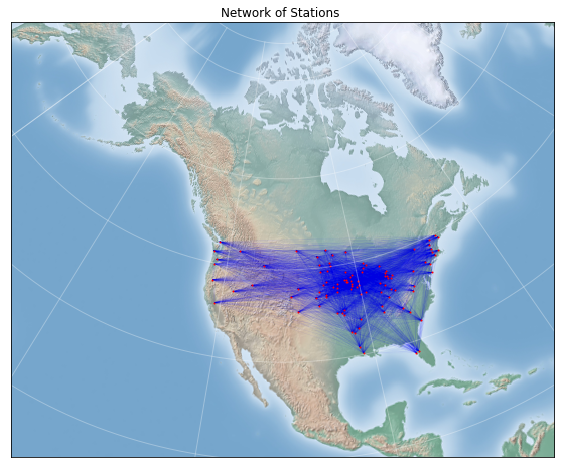

In [23]:
import matplotlib
fig = plt.figure(figsize=(15, 8), edgecolor='w')
m = Basemap(width=10000000,height=8000000,projection='lcc',
             resolution=None,lat_1=45.,lat_2=50,lat_0=50,lon_0=-107.)
G=nx.Graph()
pos={}
for key,value in edges.items():
    long1=point_dict[key[0]][1]
    long2=point_dict[key[1]][1]
    lat1=point_dict[key[0]][0]
    lat2=point_dict[key[1]][0]
    lons=[long1,long2]
    lats=[lat1,lat2]
    
    # convert lat and lon to map projection
    mx, my  = m(lons,lats)
    #print (mx,my)
    # The NetworkX part
    # put map projection coordinates in pos dictionary
    G.add_edge(key[0],key[1],distance=value)
    if key[0] not in pos.keys():
        pos[key[0]]=(mx[0],my[0])
    if key[1] not in pos.keys():    
        pos[key[1]]=(mx[1],my[1])
nx.draw_networkx_nodes(G,pos,node_size=1,node_color='r')
nx.draw_networkx_edges(G,pos,width=0.3,alpha=0.1,edge_color='b')


cmap = matplotlib.cm.get_cmap('jet')
#plt.scatter(mx, my,s=30, color ='r', alpha = 1)
plt.title('Network of Stations ', fontsize = 12)

draw_map(m)


### Centrality Analysis

In [15]:
close_dict=nx.closeness_centrality(G,distance='distance')

In [16]:
center=sorted(close_dict.items(), key=lambda x: x[1],reverse=True)[0]
center

('USC00134101', 0.0010949932961729202)

In [17]:
df_size[df_size['STATION']=='USC00134101']

,STATION,SIZE
54,USC00134101,1476


In [18]:
point_dict['USC00134101']

(41.6093, -91.5051)

### Plot the station on the basemap

In [19]:
import numpy as np
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    try:
        m.shadedrelief(scale = scale)
    except:
        pass
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')


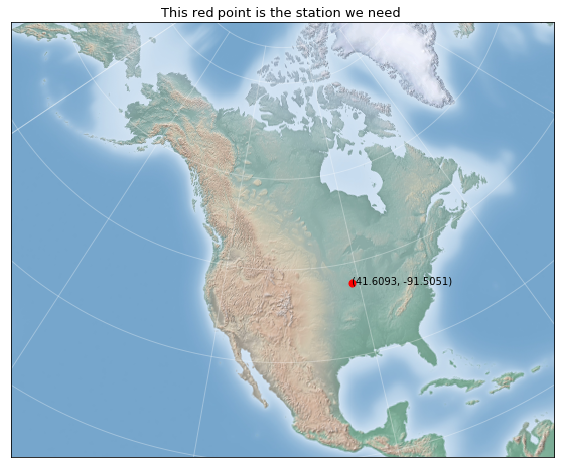

In [22]:
import matplotlib
fig = plt.figure(figsize=(10, 8), edgecolor='w')
m = Basemap(width=10000000,height=8000000,projection='lcc',
             resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

x, y  = m(-91.5051,41.6093)
cmap = matplotlib.cm.get_cmap('jet')
plt.scatter(x, y,s=50, color ='r', alpha = 1)
plt.title('This red point is the station we need ', fontsize = 13)
plt.text(x, y, '(41.6093, -91.5051)')
draw_map(m)